## Markov Chain Analysis: Absorbing Probabilities and Transition Graph for Standard Care Program

In [32]:
import numpy as np
import pandas as pd
import math

# Define the transition probability matrix in percentages
P = np.array([
    [7.3, 6.8, 9.3, 6.8, 2.5, 0.00, 0.02],
    [4.2, 7.7, 9.8, 7.2, 2.7, 0.00, 0.02],
    [3.3, 5.8, 10.8, 7.7, 2.9, 0.00, 0.02],
    [2.7, 4.8, 8.7, 8.8, 3.2, 0.01, 0.02],
    [2.1, 3.8, 6.8, 6.5, 4.2, 0.11, 0.02]
])

# Extract Q (Transient State Transition Matrix) and R (Absorbing State Transition Matrix)
Q = P[:, :5]  # Transient state transitions
R = P[:, 5:]  # Absorbing state transitions

# Step 2: Compute the Fundamental Matrix N = (I - Q)^(-1)
I = np.eye(Q.shape[0])  # Identity matrix
N = np.linalg.inv(I - Q)  # Fundamental matrix

# Compute the absorbing probability matrix B using direct multiplication of Q and R
B = np.dot(Q, R)

# Step 4: Display all results
df_Q = pd.DataFrame(Q, columns=[f"State {i+1}" for i in range(5)], index=[f"Group {i+1}" for i in range(5)])
df_R = pd.DataFrame(R, columns=["Foster Home (6)", "Death"], index=[f"Group {i+1}" for i in range(5)])
df_N = pd.DataFrame(N, columns=[f"State {i+1}" for i in range(5)], index=[f"Group {i+1}" for i in range(5)])
df_B = pd.DataFrame(B, columns=["Foster Home (6)", "Death"], index=[f"Group {i+1}" for i in range(5)])

print("\nTransition Probability Matrix (P):")
print(pd.DataFrame(P, columns=["1", "2", "3", "4", "5", "6 (Foster Home)", "Death"]))

print("\nTransient State Matrix (Q):")
print(df_Q)

print("\nAbsorbing Transition Matrix (R):")
print(df_R)

print("\nFundamental Matrix (N):")
print(df_N)

print("\nAbsorbing Probability Matrix (B):")
print(np.round(df_B,2))


Transition Probability Matrix (P):
     1    2     3    4    5  6 (Foster Home)  Death
0  7.3  6.8   9.3  6.8  2.5             0.00   0.02
1  4.2  7.7   9.8  7.2  2.7             0.00   0.02
2  3.3  5.8  10.8  7.7  2.9             0.00   0.02
3  2.7  4.8   8.7  8.8  3.2             0.01   0.02
4  2.1  3.8   6.8  6.5  4.2             0.11   0.02

Transient State Matrix (Q):
         State 1  State 2  State 3  State 4  State 5
Group 1      7.3      6.8      9.3      6.8      2.5
Group 2      4.2      7.7      9.8      7.2      2.7
Group 3      3.3      5.8     10.8      7.7      2.9
Group 4      2.7      4.8      8.7      8.8      3.2
Group 5      2.1      3.8      6.8      6.5      4.2

Absorbing Transition Matrix (R):
         Foster Home (6)  Death
Group 1             0.00   0.02
Group 2             0.00   0.02
Group 3             0.00   0.02
Group 4             0.01   0.02
Group 5             0.11   0.02

Fundamental Matrix (N):
          State 1   State 2   State 3   State 4   Stat

## Graph Visualization

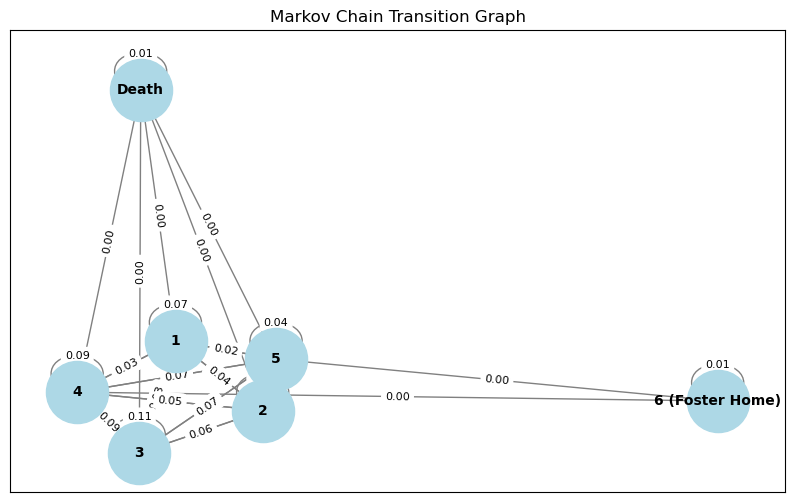

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Define states
states = ["1", "2", "3", "4", "5", "6 (Foster Home)", "Death"]

# Define transition probability matrix (normalized)
P = np.array([
    [7.3, 6.8, 9.3, 6.8, 2.5, 0.00, 0.02],
    [4.2, 7.7, 9.8, 7.2, 2.7, 0.00, 0.02],
    [3.3, 5.8, 10.8, 7.7, 2.9, 0.00, 0.02],
    [2.7, 4.8, 8.7, 8.8, 3.2, 0.01, 0.02],
    [2.1, 3.8, 6.8, 6.5, 4.2, 0.11, 0.02],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1]
]) / 100  # Convert percentages to probabilities

# Create a directed graph
G = nx.DiGraph()

# Add edges based on transition probabilities
for i in range(len(states)):
    for j in range(len(states)):
        if P[i, j] > 0:  # Only add edges for nonzero probabilities
            G.add_edge(states[i], states[j], weight=P[i, j])

# Define positions using a circular layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)

# Draw edges with labels
edges = nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')
labels = {(states[i], states[j]): f"{P[i, j]:.2f}" for i in range(len(states)) for j in range(len(states)) if P[i, j] > 0}
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

# Display the graph
plt.title("Markov Chain Transition Graph")
plt.show()
